In [1]:
%load_ext autoreload
%autoreload 2
from functions import *
%matplotlib widget

# Test 5: 5 dimensiones

## Init

In [2]:
SurfaceSourceFile = kds.SurfaceSourceFile("surface_source.mcpl", domain={"w": [0, 1]})
df = SurfaceSourceFile.get_pandas_dataframe()
del SurfaceSourceFile

Number of particles in file surface_source.mcpl: 3514158
100% n, 0% g, 0% e-, 0% e+, 0% p, 


In [3]:
columns_order = ["x", "y", "ln(E0/E)", "mu", "phi"]
# columns_order = ["x","y","ln(E0/E)","mu"]
df = df[columns_order+["wgt"]]

In [4]:
micro_bins = [150] * len(columns_order)
# macro_bins = [25] * len(columns_order)
macro_bins = [12,10,8,6,6]

## Plotting the surface source

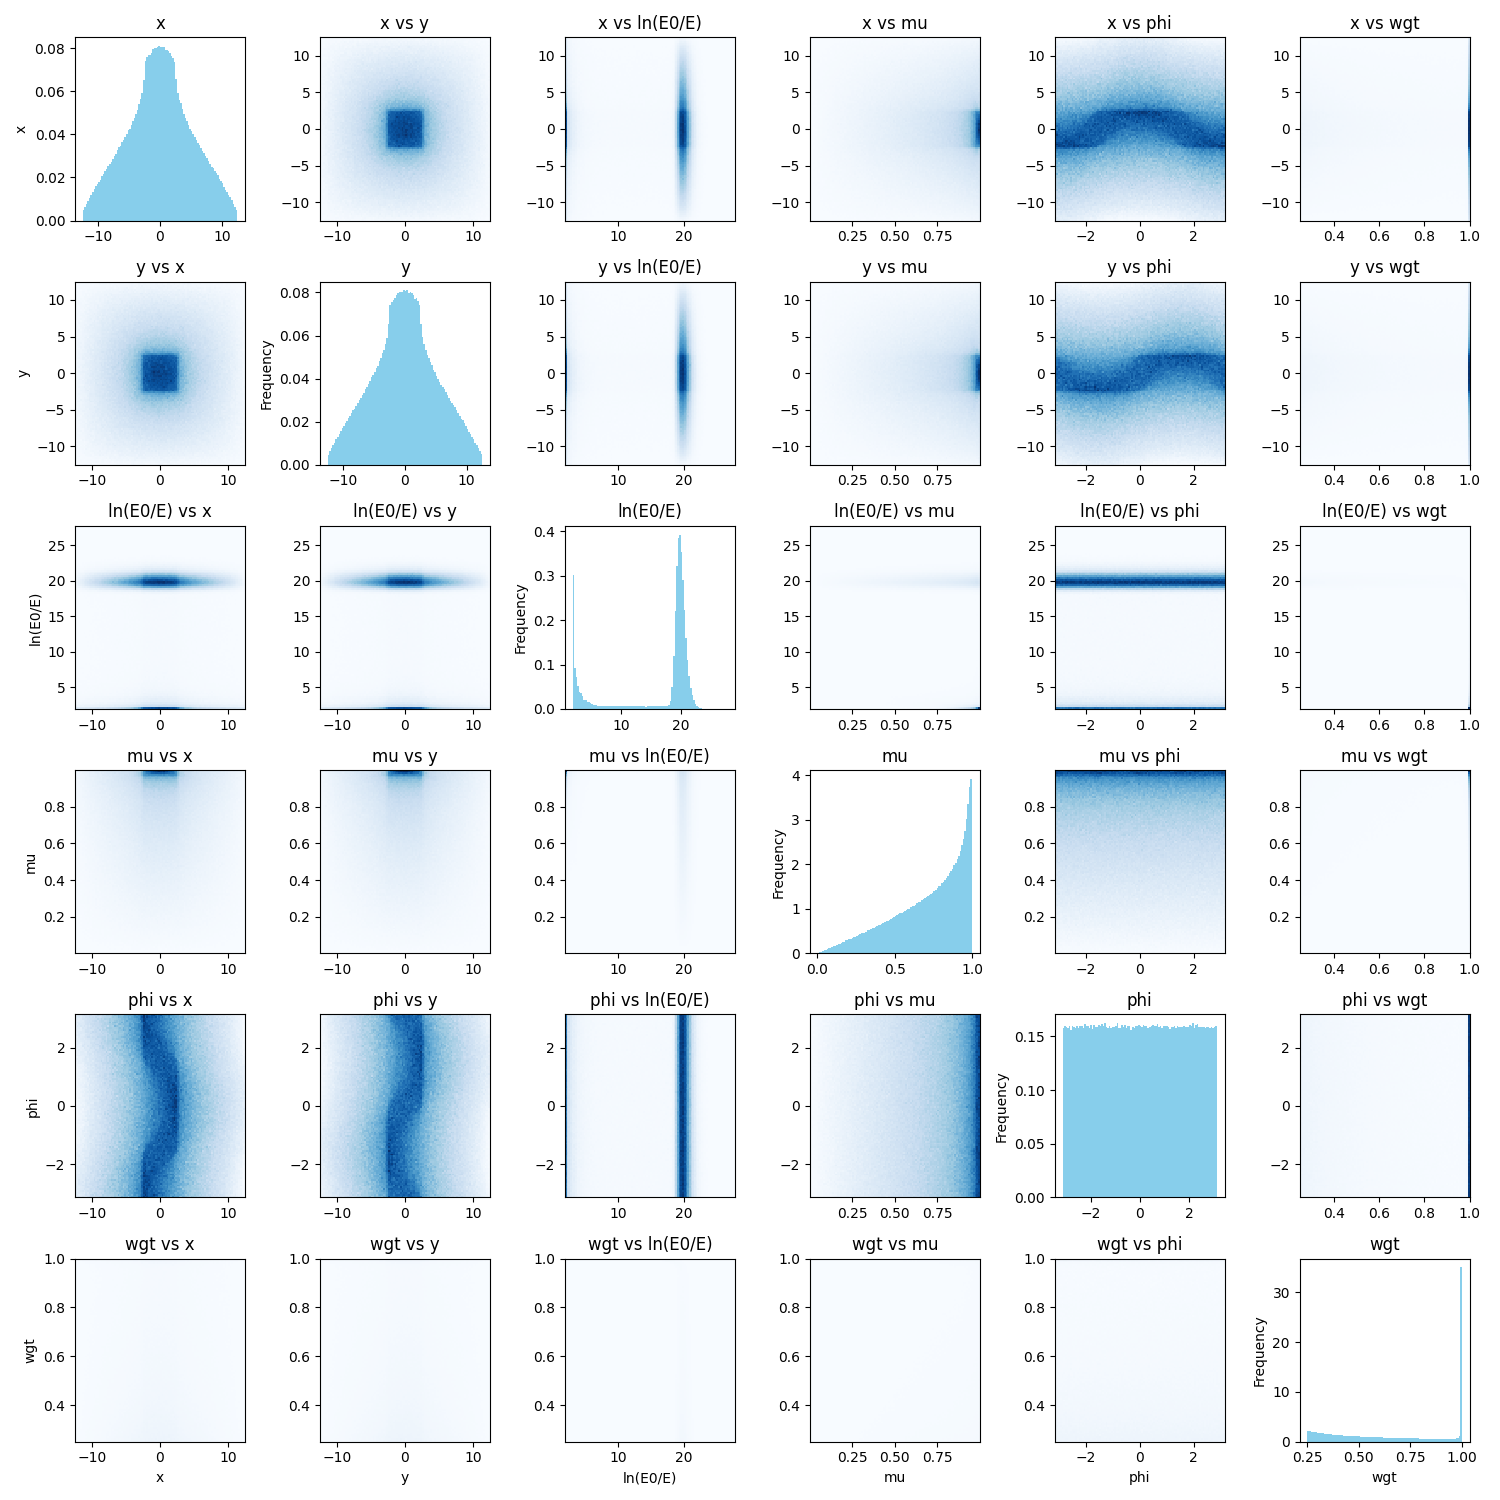

In [5]:
plot_correlated_variables(df, columns_order+["wgt"], bin_size_diagonal=100, bin_size_off_diagonal=100)

## n_dimensional functions to get cumulatives and sample

In [6]:
cumul, micro, macro =calculate_cumulative_histograms(df, columns_order, micro_bins, macro_bins)
cumul2, micro2, macro2 =calculate_cumulative_histograms2(df, columns_order, micro_bins, macro_bins)

In [11]:
sampled_df = sample_df(cumul,micro, macro, columns_order,3_000_000)
sampled_df2 = sample_df(cumul2,micro2, macro2, columns_order,3_000_000)

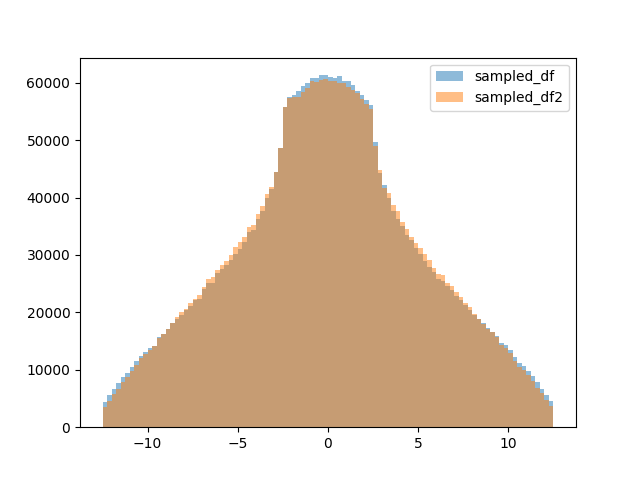

In [12]:
# plot_correlated_variables(sampled_df, columns_order)

plt.figure()
plt.hist(sampled_df["x"], bins=100, alpha=0.5, label="sampled_df")
plt.hist(sampled_df2["x"], bins=100, alpha=0.5, label="sampled_df2")
plt.legend()
plt.show()